### OpenCV-Python is a library of Python bindings designed to solve computer vision problems.

OpenCV supports a wide variety of programming languages such as C++, Python, Java, etc., and is available on different platforms including Windows, Linux, OS X, Android, and iOS.

OpenCV-Python makes use of Numpy, which is a highly optimized library for numerical operations

In [ ]:
import cv2
import os
import pickle
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
import numpy as np

### open webcam and capture a frame 

In [ ]:
webcam = cv2.VideoCapture(0)
ret ,frame = webcam.read()
print (ret)
webcam.release()

#### webcam.read(): returns a frame and boolean value(True/False)..if frame is read correctly, it will be True. 

#### webcam.release() :to close webcam

In [ ]:
type(frame)

### Display an image

In [ ]:
cv2.imshow("opencv_2", frame)
 
# Press any key to close external window
cv2.waitKey(0)   
cv2.destroyAllWindows() 

#### cv.waitKey() is a keyboard binding function. Its argument is the time in milliseconds. The function waits for specified milliseconds for any keyboard event. If you press any key in that time, the program continues. If 0 is passed, it waits indefinitely for a key stroke


#### cv.destroyAllWindows() simply destroys all the windows we created.

### To create external window

In [ ]:
cv2.namedWindow('open_cv', cv2.WINDOW_NORMAL)
cv2.imshow('open_cv',frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(frame)
plt.show()

In [ ]:
### matplotlib support RGB and opencv support BGR

In [ ]:
frame_RGB = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(frame_RGB)
plt.show()

### Read and Write Images

In [ ]:
cv2.imwrite('images/picture_RGB.jpg',frame_RGB)

In [ ]:
picture = cv2.imread('images/picture_RGB.jpg')

TypeError: Image data cannot be converted to float

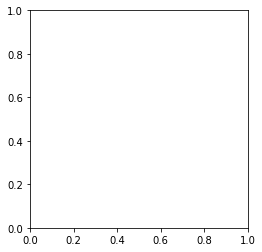

In [13]:
plt.imshow(picture)
plt.show()

In [ ]:
# Open connection to camera
webcam = cv2.VideoCapture(0)

#External Window or in Notebook
cv2.namedWindow("opencv_1", cv2.WINDOW_AUTOSIZE)
 
while True:
      
    ret, frame = webcam.read()
    cv2.imshow("opencv_1", frame) 
     
    # Press q for close window
    #here 10 is a milliseconds
    if cv2.waitKey(10)== ord('q'):
        break
webcam.release()        
cv2.destroyAllWindows() 

### Face Detection using Haar Cascades

List of available pretraied models in OpenCV:

<div style="float: left; width: 50%">
<ul>
    <li> haarcascade_eye_tree_eyeglasses  
    <li> haarcascade_mcs_leftear
    <li> haarcascade_eye                  
    <li> haarcascade_mcs_lefteye
    <li> haarcascade_frontalface_alt2   
    <li> haarcascade_mcs_mouth
    <li> haarcascade_frontalface_alt_tree
    <li> haarcascade_mcs_nose
    <li> <font style="color: #be2830">haarcascade_frontalface_alt</font>       
    <li> haarcascade_mcs_rightear
    <li> haarcascade_frontalface_default
</ul>
</div>
<div style="float: right; width: 50%">
<ul>
    <li> haarcascade_mcs_righteye
    <li> haarcascade_fullbody            
    <li> haarcascade_mcs_upperbody
    <li> haarcascade_lefteye_2splits    
    <li> haarcascade_profileface
    <li> haarcascade_lowerbody            
    <li> haarcascade_righteye_2splits
    <li> haarcascade_mcs_eyepair_big     
    <li> haarcascade_smile
    <li> haarcascade_mcs_eyepair_small
    <li> haarcascade_upperbody
</ul>
</div>


### Detecting Faces with OpenCV

### detector = cv2.CascadeClassifier( xml_file_path)

### face_coord = detector.detectMultiScale(image, scale_factor, min_neighbors, min_size, max_size)

#### image : gray scale image where face are detected.


#### scale_factor:Parameter specifying how much the image size is reduced at each image scale.


#### minNeighbors – Parameter specifying how many neighbors each candidate rectangle should have to retain it.


#### minSize – Minimum possible object size. Objects smaller than that are ignored.


#### maxSize – Maximum possible object size. Objects larger than that are ignored.

In [ ]:
picture.shape

In [ ]:

faceDetect=cv2.CascadeClassifier('xml/frontal_face.xml')
cam = cv2.VideoCapture(0)

cv2.namedWindow("Face", cv2.WINDOW_AUTOSIZE)

while True:
    ret,img = cam.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = faceDetect.detectMultiScale(gray,scaleFactor=1.2,minNeighbors=5)

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
    
    
    
    
    
    cv2.imshow("Face",img)
    if (cv2.waitKey(10)== ord('q')):
        break

cam.release()
cv2.destroyAllWindows()

<h2 align="center" style='color: #be2830'>Build Our Dataset</h2>
<h4 align="center">
Detect $\rightarrow$ Cut $\rightarrow$ Normalize $\rightarrow$ Resize $\rightarrow$ Save</h4>

### detect face

In [1]:
def detect_face(frame):
    if frame.ndim!=2:
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        
    detector = cv2.CascadeClassifier("xml/frontal_face.xml")

    faces = detector.detectMultiScale(frame,1.2,5)
    
    return faces

In [2]:
def gray_scale(image):
    if image.ndim!=2:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    return image

### Cut face

In [3]:
def cut_faces(image, faces_coord):
    faces = []
      
    for (x, y, w, h) in faces_coord:
        
        faces.append(image[y: y + h, x : x + w ])
         
    return faces

### Normalize faces by increasing pixel intensity(brightness)

In [4]:
def normalize_intensity(images):
    images_norm = []
    for image in images:
        is_color = len(image.shape) == 3 
        if is_color:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        images_norm.append(cv2.equalizeHist(image))
    return images_norm

### Resize

#### cv.INTER_AREA for shrinking & cv.INTER_CUBIC for zooming

In [5]:
def resize(images,size=(47,62)):
    image_resize = []
    
    for image in images:
        if image.shape < size:
            img_size = cv2.resize(image,size,interpolation=cv2.INTER_CUBIC)
        else:
            img_size = cv2.resize(image,size,interpolation=cv2.INTER_AREA)
        image_resize.append(img_size)
        
    return image_resize

### Make pipeline

In [6]:
def normalize_faces(frame, faces_coord):
    gray_frame = gray_scale(frame)
    faces = cut_faces(gray_frame, faces_coord)
    faces = normalize_intensity(faces)
    
    faces = resize(faces)
    return faces

In [7]:
def plot_show(image,title=""):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.axis("off")
    plt.title(title)
    plt.imshow(image,cmap="Greys_r")
    plt.show()

In [8]:
def draw_rectangle(image, coords):
    for (x, y, w, h) in coords:
        #w_rm = int(0.2 * w / 2) 
        cv2.rectangle(image, (x , y), (x + w , y + h), (0,0,255),2)

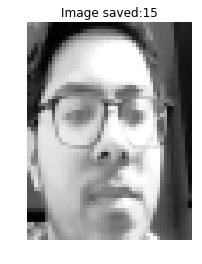

In [9]:
import cv2
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

cam = cv2.VideoCapture(0)
#cv2.namedWindow("Face", cv2.WINDOW_AUTOSIZE)
folder = "people/"+input('Person:').lower()


if not os.path.exists(folder):
    os.mkdir(folder)
    
    flag_start_capturing = False
    sample=1
    #cam = cv2.VideoCapture(0)
    cv2.namedWindow("Face", cv2.WINDOW_AUTOSIZE)

    while True:
        ret,frame = cam.read()
        
        
        
        faces_coord = detect_face(frame)

        if len(faces_coord):
            faces = normalize_faces(frame,faces_coord)
            #faces = normalize_intensity(faces)
            cv2.imwrite(folder + '/' + str(sample)+'.jpg',faces[0])
            plot_show(faces[0],"Image saved:"+str(sample))
            clear_output(wait=True)
            if flag_start_capturing == True:
                sample += 1
            
        draw_rectangle(frame,faces_coord)
        cv2.imshow('Face',frame)
        keypress=cv2.waitKey(1)
        
        if keypress == ord('c'):
            
            if flag_start_capturing == False:
                flag_start_capturing = True
            
        
        if sample >15:
            break

    cam.release()
    cv2.destroyAllWindows()
else:
    print ("This name already exists.")

### Create dataset for unknown people

In [ ]:
### datasets for other class

basepath = 'C:\\Users\\Vineet\\scikit_learn_data\\lfw_home\\lfw_funneled\\'
#C:\Users\Vineet\scikit_learn_data\lfw_home
images = os.listdir(basepath) 
print (len(images))
data = images[:210]

for i,folder in enumerate(data,start=1):
    
    files=os.listdir(basepath+'\\'+folder)
    for k,img in enumerate(files,start=1):
        if img.endswith('.jpg'):
            #print img
            frame=cv2.imread(basepath+'\\'+folder+'\\'+img,0)
        #print frame
       
            faces_coord = detect_face(frame)
            if len(faces_coord):
                faces = cut_faces(frame, faces_coord)
                #print faces
                faces = normalize_intensity(faces)
                faces = resize(faces)
                cv2.imwrite('people/unknown/' + str(i)+'.jpg',faces[0])
                
                break

### collect dataset

In [12]:
def collect_dataset():
    images = []
    labels = []
    labels_dic = {}
    #people = [person for person in os.listdir("Male_female/")]
    people = [person for person in os.listdir("people/")]
    #people = [person for person in os.listdir("people/")]
    for i, person in enumerate(people):
        labels_dic[i] = person
        for image in os.listdir("people/" + person):
            if image.endswith('.jpg'):
                images.append(cv2.imread("people/" + person + '/' + image, 0))
                labels.append(i)
    return (images, np.array(labels), labels_dic)

In [ ]:
images, labels, labels_dic = collect_dataset()

In [ ]:
print (len(images))
print (labels_dic)

In [ ]:
#labels

In [ ]:
X_train=np.asarray(images)

In [ ]:
X_train.shape

In [ ]:
train=X_train.reshape(len(X_train),-1)

In [ ]:
train.shape

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(train.astype(np.float64))

In [ ]:
pca1 = PCA(n_components=.97)
new_train=pca1.fit_transform(X_train_sc)

In [ ]:
pca1.n_components_

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,KFold

In [ ]:
kf=KFold(n_splits=5,shuffle=True)

In [ ]:
param_grid = {'C':[.0001,.001,.01,.1,1,10]}

In [ ]:
gs_svc = GridSearchCV(SVC(kernel='linear',probability=True),param_grid=param_grid,cv=kf,scoring='accuracy')

In [ ]:
gs_svc.fit(new_train,labels)

In [ ]:
gs_svc.best_score_

In [ ]:
gs_svc.best_params_

In [ ]:
clf=gs_svc.best_estimator_

In [ ]:
import pickle

In [ ]:


filename = 'svc_linear_face.pkl'
f=open(filename, 'wb')
pickle.dump(clf,f)
 

f.close()


In [ ]:
filename = 'svc_linear_face.pkl'
svc1 = pickle.load(open(filename, 'rb'))

In [ ]:
cam = cv2.VideoCapture(1)
font=cv2.FONT_HERSHEY_PLAIN
cv2.namedWindow("opencv_face", cv2.WINDOW_AUTOSIZE)



while True:
    ret,frame = cam.read()
    
    
    faces_coord = detect_face(frame) # detect more than one face
    if len(faces_coord):
        faces = normalize_faces(frame, faces_coord)
        #faces = normalize_intensity(faces)
        for i, face in enumerate(faces): # for each detected face
            
            
            #cv2.imwrite('trainingData/female/picture_BGR5.jpg',face)
            t=face.reshape(1,-1)
            t=sc.transform(t.astype(np.float64))
            test = pca1.transform(t)    
            #print test
            #transform = test.reshape(1,-1)
            #print transform
            prob=svc1.predict_proba(test)
            confidence = svc1.decision_function(test)
            print (confidence)
            print (prob)
           
            
            
            pred = svc1.predict(test)
            print (pred,pred[0])
           
            name=labels_dic[pred[0]].capitalize()
            print (name)
            
            #pred = labels_dic[pred[0]].capitalize()
            #threshold = .50
            
            
                
            cv2.putText(frame,name,(faces_coord[i][0], faces_coord[i][1] - 10),
                       cv2.FONT_HERSHEY_PLAIN, 2, (66, 53, 243), 2)
            
                
           
           # if prob[0][1]>.85:
                
            #    cv2.putText(frame, 'vineet',(faces_coord[i][0], faces_coord[i][1] - 10),
             #               cv2.FONT_HERSHEY_PLAIN, 2, (66, 53, 243), 2)
            
                
            #else:
             #   cv2.putText(frame,'unknown',(faces_coord[i][0], faces_coord[i][1] - 10),
              #              cv2.FONT_HERSHEY_PLAIN, 3, (66, 53, 243), 2)
                
                
           
        clear_output(wait = True)
        draw_rectangle(frame, faces_coord) # rectangle around face
        
    cv2.putText(frame, "ESC to exit", (5, frame.shape[0] - 5),cv2.FONT_HERSHEY_PLAIN, 1.3, (66, 53, 243), 2,
                cv2.LINE_AA)
    
    cv2.imshow("opencv_face", frame) # live feed in external
    if cv2.waitKey(5) == 27:
        break
        
cam.release()
cv2.destroyAllWindows()
        